In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pwd

'C:\\Users\\IBS'

In [7]:
data=pd.read_csv('analytics.csv')

In [8]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.38,0.53,2,157,3,0,1,0,sales,low,NaN,NaN,NaN
1,0.80,0.86,5,262,6,0,1,0,sales,medium,NaN,NaN,NaN
2,0.11,0.88,7,272,4,0,1,0,sales,medium,NaN,NaN,NaN
3,0.72,0.87,5,223,5,0,1,0,sales,low,NaN,NaN,NaN
4,0.37,0.52,2,159,3,0,1,0,sales,low,NaN,NaN,NaN
5,0.41,0.50,2,153,3,0,1,0,sales,low,NaN,NaN,NaN
6,0.10,0.77,6,247,4,0,1,0,sales,low,NaN,NaN,NaN
7,0.92,0.85,5,259,5,0,1,0,sales,low,NaN,NaN,NaN
8,0.89,1.00,5,224,5,0,1,0,sales,low,NaN,NaN,NaN
9,0.42,0.53,2,142,3,0,1,0,sales,low,NaN,NaN,


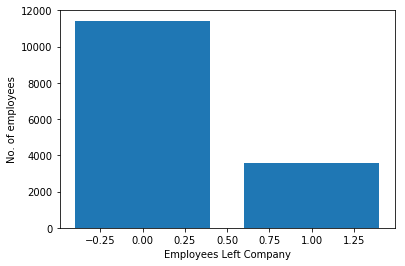

In [11]:
#look at the stats of the ppl who left the organisation 

left=data.groupby('left')
left.mean()

#overallstats

data.describe()

#plot the data to see the counts

left_count=data.groupby('left').count()
plt.bar(left_count.index.values,left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('No. of employees')
plt.show()



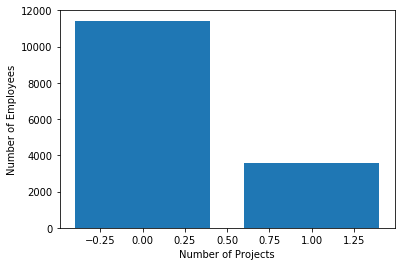

In [12]:
data.left.value_counts()
#plot no. of employees allocated to no. of projects 
num_projects=data.groupby('number_project').count()
plt.bar(left_count.index.values,left_count['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

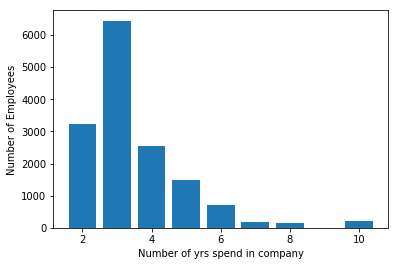

In [15]:
#time spend in company
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values,time_spent['satisfaction_level'])
plt.xlabel('Number of yrs spend in company')
plt.ylabel('Number of Employees')
plt.show()

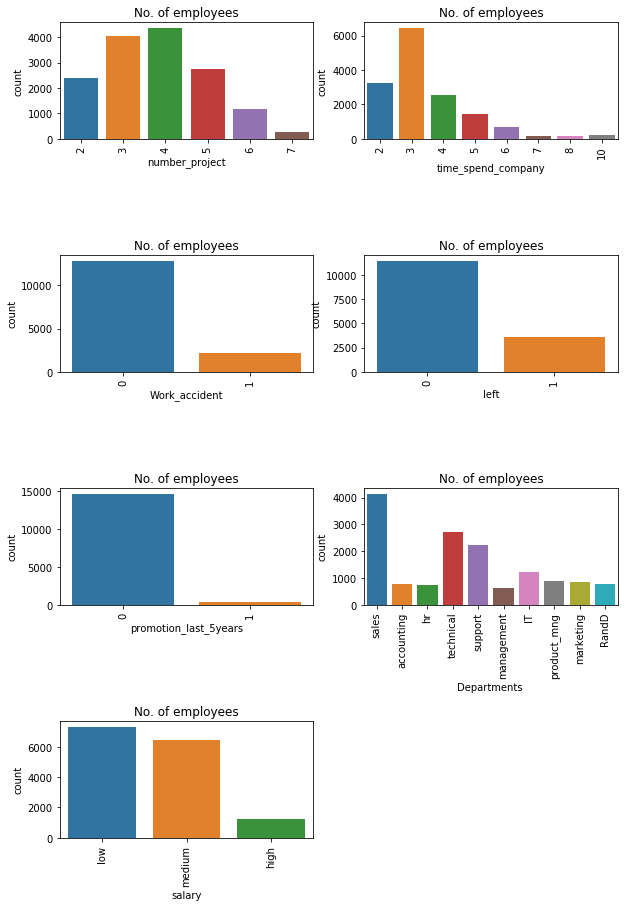

In [18]:
#plot all the graphs in the single run

features=['number_project','time_spend_company','Work_accident','left','promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=data)
    plt.xticks(rotation=90)
    plt.title("No. of employees")

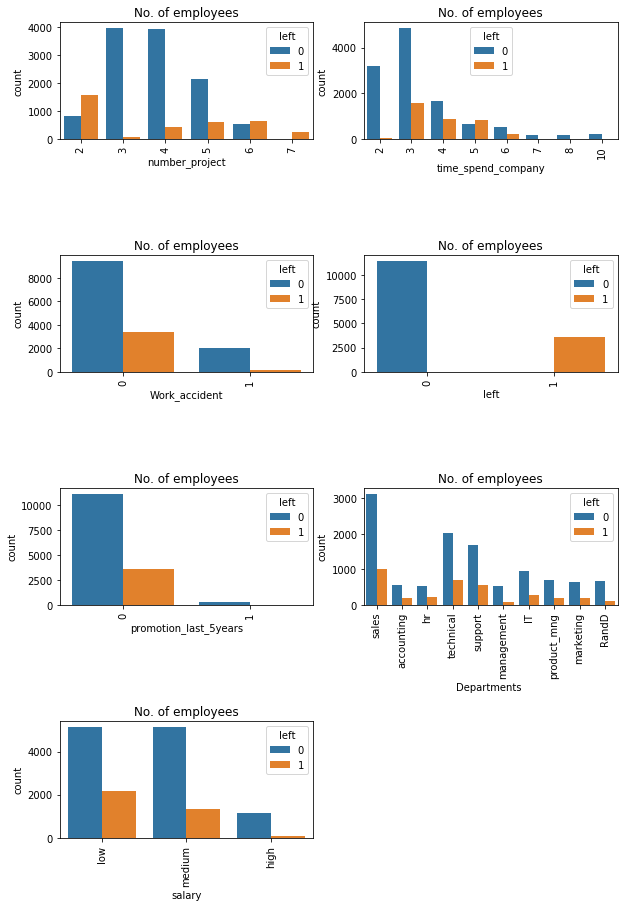

In [19]:
#some more subplots

fig=plt.subplots(figsize=(10,15))
for i,j in enumerate(features):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=data,hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employees")

In [22]:
#CLUSTER ANALYSIS

#import module
from sklearn.cluster import KMeans
#Filter data
left_emp=data[['satisfaction_level','last_evaluation']][data.left==1]
#create groups using K-means clustering
kmeans=KMeans(n_clusters=3,random_state=0).fit(left_emp)